In [2]:
import spotipy
import json
import sys
import pandas as pd
sys.path.insert(1, r'C:\Users\urgpa\OneDrive\Escritorio\Documentos\RELHACKERS\LEWORK\DAY6_2\EX')
from config import *
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= Client_ID,
                                                           client_secret= Client_Secret))
realDf = pd.DataFrame()#loadit from somewhere

GET SONGS

In [4]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        possibleres = sp.next(results)       
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

#songs = get_playlist_tracks("spotify", "6m6rlUODqCw0laaefLD43b")

def get_audio_features_fromplaylist(songlist):
    features_dict = {}
    for track in songlist:
        afeatures = sp.audio_features(track["track"]["uri"])
        features_dict[track['track']['name']] = afeatures
    return features_dict

#dictionary = get_audio_features_fromplaylist(songs)

def get_audio_features_from_songlist(songs):
    for song in songs:
        x = sp.search(q=song, limit=1) 
        my_dict_new = {}
        afeatures=sp.audio_features(x["tracks"]["items"][0]["uri"])
        #print(afeatures)
        my_dict_new[x['tracks']['items'][0]['name']] = afeatures
        #my_dict_new={ key:[my_dict[key]]for key in list(my_dict.keys())}
    return my_dict_new

#dictionary = get_audio_features_from_songlist(['como el agua'])

def add_song_features_to_dataf (actualDf,diction):
    #actualDf = pd.DataFrame() #columns = list(dictionary['Hotel California - From "The Big Lebowsky"'][0].keys())
    for song in diction.keys():
        song_stats_dict = diction[song][0]
        dataf = pd.DataFrame(song_stats_dict,columns = list(song_stats_dict.keys()), index=[song])
        actualDf = pd.concat([actualDf,dataf])
        
    return actualDf

#tempDf = add_song_features_to_dataf(realDf,dictionary)

def drop_columns(df,list_to_drop):
    df = df.drop(list_to_drop, axis = 1)
    return df
#realDf = drop_columns(tempDf, ['type','id','uri','track_href','analysis_url','duration_ms','time_signature'])

GET FEATURES

FROM HERE U CAN ADD A LIST OF SONGS AND IT WILL GIVE U THE FEATURES

In [21]:
songs

[{'added_at': '2020-01-25T22:39:28Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/ekaitzm.g'},
   'href': 'https://api.spotify.com/v1/users/ekaitzm.g',
   'id': 'ekaitzm.g',
   'type': 'user',
   'uri': 'spotify:user:ekaitzm.g'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3IYUhFvPQItj6xySrBmZkd'},
      'href': 'https://api.spotify.com/v1/artists/3IYUhFvPQItj6xySrBmZkd',
      'id': '3IYUhFvPQItj6xySrBmZkd',
      'name': 'Creedence Clearwater Revival',
      'type': 'artist',
      'uri': 'spotify:artist:3IYUhFvPQItj6xySrBmZkd'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA

In [ ]:
songs = get_playlist_tracks("spotify", "6m6rlUODqCw0laaefLD43b")

#dictionary = get_audio_features_from_songlist(['como el agua'])
dictionary = get_audio_features_fromplaylist(songs)

tempDf = add_song_features_to_dataf(realDf,dictionary)
realDf = drop_columns(tempDf, ['type','id','uri','track_href','analysis_url','duration_ms','time_signature'])

TRAIN MODEL

TEST MODEL

In [9]:
X_prep = StandardScaler().fit_transform(realDf)
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [10]:
kmeans = KMeans(n_clusters= 6,
                init="random",
                n_init= 8,  # try with 1, 4, 8, 20, 30, 100...
                max_iter= 400,
                tol= 1e-4,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)
#print(pd.Series(clusters).value_counts().sort_index())
#print(str(kmeans.inertia_))
#print(clusters)
#print(len(clusters))
#print(kmeans.cluster_centers_)

In [11]:
final_df = realDf
cols = list(final_df.columns)
cols.append('gen')
refinal_df = pd.DataFrame(columns = cols)
rerefinal_df = pd.concat([refinal_df,final_df])
rerefinal_df.gen = list(clusters)
#rerefinal_df.name = rerefinal_df.index.apply(lambda x: x)
#final_df = pd.concat([final_df,gen])
#rerefinal_df

In [20]:
rerefinal_df[rerefinal_df.gen == 2]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,gen
Wish You Were Here - 2011 Remastered Version,0.481,0.262,7,-15.730,1,0.0414,0.7350,0.011400,0.8320,0.3750,122.883,2
Stairway to Heaven - Remaster,0.338,0.340,9,-12.049,0,0.0339,0.5800,0.003200,0.1160,0.1970,82.433,2
Mr. Blue Sky,0.388,0.338,10,-10.054,1,0.0328,0.6520,0.000004,0.2480,0.4770,177.784,2
Changes - 2015 Remaster,0.547,0.308,0,-11.750,1,0.0377,0.5050,0.000000,0.1090,0.4100,114.719,2
I Need Some Sleep,0.664,0.307,0,-10.140,1,0.0325,0.8690,0.458000,0.1070,0.1930,128.029,2
Hallelujah,0.324,0.136,0,-10.330,1,0.0318,0.9310,0.001170,0.1760,0.0831,97.256,2
Stand by Me,0.650,0.306,9,-9.443,1,0.0393,0.5700,0.000007,0.0707,0.6050,118.068,2
Imagine - Remastered 2010,0.547,0.257,0,-12.358,1,0.0252,0.9070,0.183000,0.0935,0.1690,75.752,2
Unchained Melody,0.339,0.208,0,-16.725,1,0.0308,0.3960,0.000519,0.1800,0.2880,98.540,2
Cry Baby,0.474,0.418,0,-9.654,1,0.0299,0.5140,0.000343,0.0535,0.5040,83.308,2


In [13]:
for i in range(0,6):
    print(i)
    print(rerefinal_df[rerefinal_df.gen == i].mean())
    print('')

0
danceability          0.703632
energy                0.678347
key                   5.168421
loudness             -8.952989
mode                  0.821053
speechiness           0.052553
acousticness          0.209044
instrumentalness      0.025564
liveness              0.158022
valence               0.763495
tempo               114.583800
gen                   0.000000
dtype: float64

1
danceability          0.475048
energy                0.817161
key                   4.338710
loudness             -5.881742
mode                  1.000000
speechiness           0.050555
acousticness          0.069712
instrumentalness      0.013053
liveness              0.259466
valence               0.564258
tempo               136.162790
gen                   1.000000
dtype: float64

2
danceability          0.470073
energy                0.370707
key                   3.560976
loudness            -10.852000
mode                  0.829268
speechiness           0.038532
acousticness          0.572439
i

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

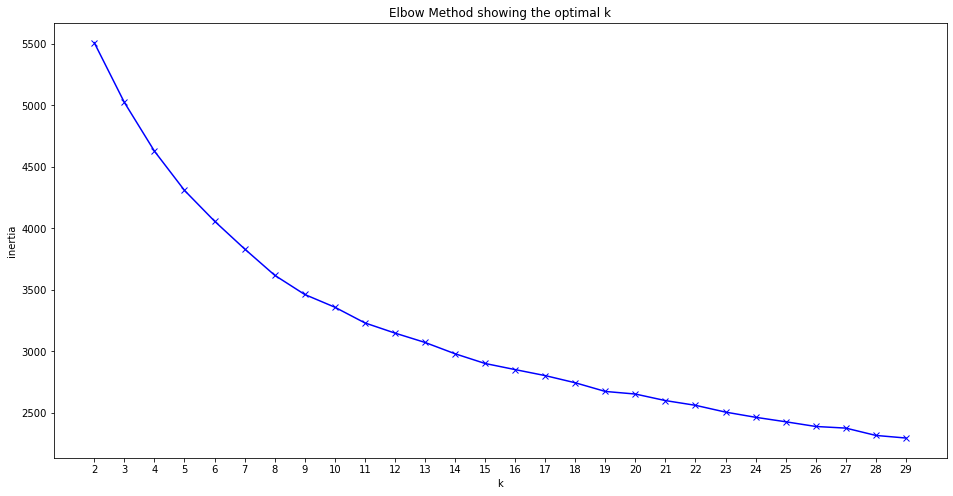

In [102]:
K = range(2, 30)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

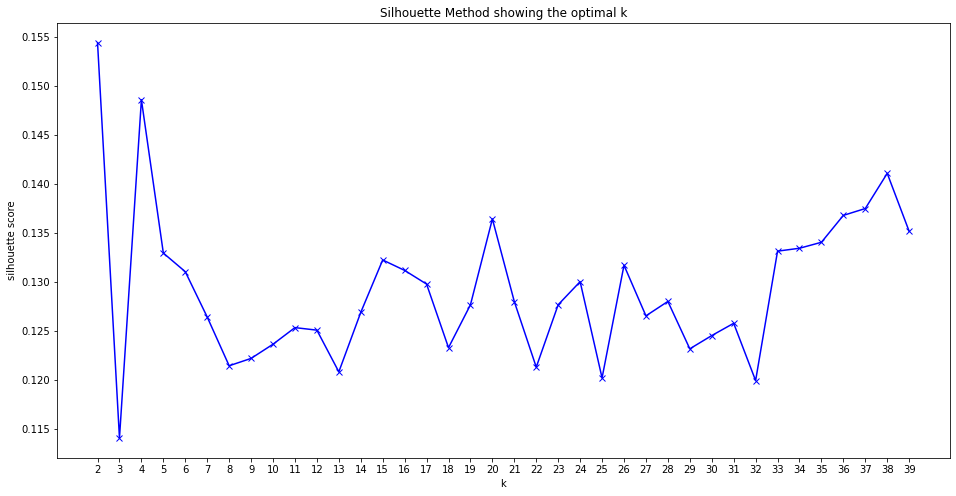

In [103]:
K = range(2, 40)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')